# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import datetime


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)



### Generate the Cities List by Using the `citipy` Library


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []


# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests
from datetime import datetime
from api_keys import weather_api_key
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"
# url= "https://api.openweathermap.org/data/2.5/weather?lat={lats}&lon={lngs}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# API configuration
base_url = "https://api.openweathermap.org/data/2.5/weather?q="

# Initialize city_data list
city_data = []


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print(f"No weather data found for {city}. Skipping...")
        print("City not found. Skipping...")
     
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_url)


Beginning Data Retrieval     
-----------------------------
Processing Record {record_count} of Set {set_count} | {city}
{'coord': {'lon': -151.4333, 'lat': -16.7333}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 300.42, 'feels_like': 302.86, 'temp_min': 300.42, 'temp_max': 300.42, 'pressure': 1013, 'humidity': 74, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 3.85, 'deg': 71, 'gust': 3.91}, 'rain': {'1h': 0.18}, 'clouds': {'all': 14}, 'dt': 1684008768, 'sys': {'country': 'PF', 'sunrise': 1683994887, 'sunset': 1684035770}, 'timezone': -36000, 'id': 4033205, 'name': 'Uturoa', 'cod': 200}
Processing Record {record_count} of Set {set_count} | {city}
{'coord': {'lon': 147.3167, 'lat': -43.0167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 276.82, 'feels_like': 274.9, 'temp_min': 276.33, 'temp_ma

{'coord': {'lon': 89.5342, 'lat': 56.2078}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 271.14, 'feels_like': 271.14, 'temp_min': 271.14, 'temp_max': 271.14, 'pressure': 1018, 'humidity': 46, 'sea_level': 1018, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 1.29, 'deg': 141, 'gust': 1.26}, 'clouds': {'all': 9}, 'dt': 1684008775, 'sys': {'country': 'RU', 'sunrise': 1684014660, 'sunset': 1684073133}, 'timezone': 25200, 'id': 1509852, 'name': 'Bogotol', 'cod': 200}
Processing Record {record_count} of Set {set_count} | {city}
{'coord': {'lon': 117.7016, 'lat': 9.0629}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.59, 'feels_like': 299.59, 'temp_min': 299.59, 'temp_max': 299.59, 'pressure': 1010, 'humidity': 86, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.1, 'deg': 166, 'gust': 0

SSLError: HTTPSConnectionPool(host='api.openweathermap.org', port=443): Max retries exceeded with url: /data/2.5/weather?&appid=cbf1e257415eccea9bc1257e148340c3&q=kletnya (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:997)')))

In [4]:
# Set the API base URL
# url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"
url = "https://api.openweathermap.org/data/2.5/weather?&appid=35355e1bc83a5c317e072bc1b9e9b3c0&q=Abu"
city_url = url + "&q=" + "Abu Dhabi"
print (city_url)

https://api.openweathermap.org/data/2.5/weather?&appid=35355e1bc83a5c317e072bc1b9e9b3c0&q=Abu&q=Abu Dhabi


In [5]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          22
Lat           22
Lng           22
Max Temp      22
Humidity      22
Cloudiness    22
Wind Speed    22
Country       22
Date          22
dtype: int64

In [6]:
# Display sample data
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        22 non-null     object 
 1   Lat         22 non-null     float64
 2   Lng         22 non-null     float64
 3   Max Temp    22 non-null     float64
 4   Humidity    22 non-null     int64  
 5   Cloudiness  22 non-null     int64  
 6   Wind Speed  22 non-null     float64
 7   Country     22 non-null     object 
 8   Date        22 non-null     object 
dtypes: float64(4), int64(2), object(3)
memory usage: 1.7+ KB


In [7]:
# Export the City_Data into a csv
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
import pandas as pd
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Uturoa,-16.7333,-151.4333,300.42,74,14,3.85,PF,2023-05-13 20:12:48
1,Blackmans Bay,-43.0167,147.3167,278.22,93,48,2.06,AU,2023-05-13 20:12:49
2,Badger,64.8000,-147.5333,290.37,39,0,6.17,US,2023-05-13 20:12:49
3,Utrik,11.2278,169.8474,300.46,81,38,7.35,MH,2023-05-13 20:12:50
4,Edinburgh Of The Seven Seas,-37.0676,-12.3116,291.50,95,100,11.85,SH,2023-05-13 20:12:50


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

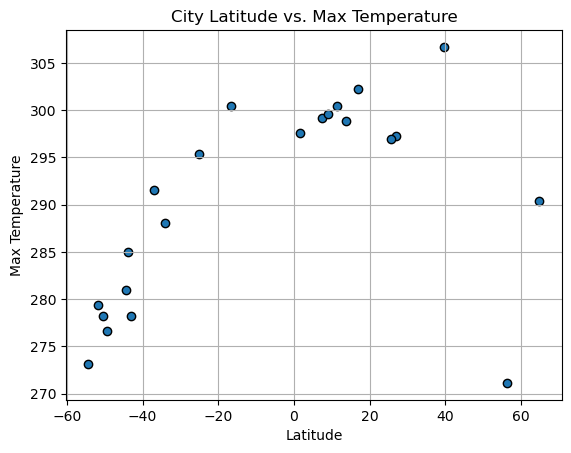

In [9]:
# Build scatter plot for latitude vs. temperature
import matplotlib.pyplot as plt
import pandas as pd
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

plt.title(f"City Latitude vs. Max Temperature")



# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

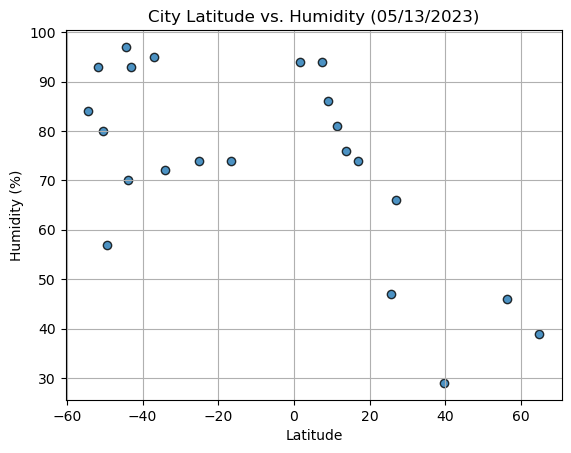

In [10]:
import matplotlib.pyplot as plt
from datetime import datetime
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Humidity ({datetime.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

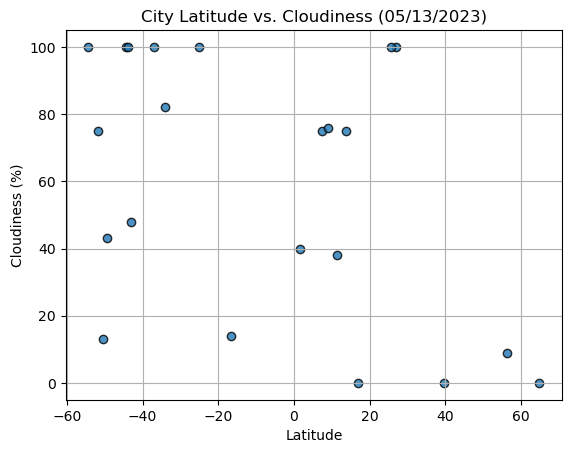

In [11]:
import matplotlib.pyplot as plt
from datetime import datetime
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.today().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

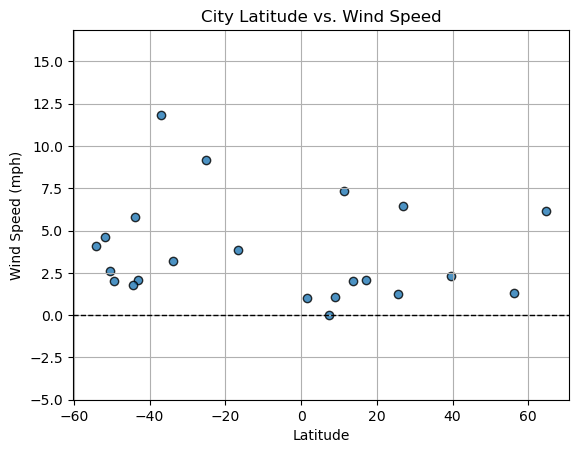

In [12]:
import matplotlib.pyplot as plt
from datetime import datetime
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(-5, max(city_data_df["Wind Speed"])+5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
   
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r-")
  
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
 
    plt.title(title)

    plt.xlabel('Latitude')
    plt.ylabel(title)

    print(f"The r-squared is: {rvalue**2}")

    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Badger,64.8000,-147.5333,290.37,39,0,6.17,US,2023-05-13 20:12:49
3,Utrik,11.2278,169.8474,300.46,81,38,7.35,MH,2023-05-13 20:12:50
8,Cooper'S Town,26.8667,-77.5167,297.30,66,100,6.44,BS,2023-05-13 20:12:52
10,Weno,7.4515,151.8468,299.12,94,75,0.00,FM,2023-05-13 20:12:53
11,Manado,1.4870,124.8455,297.58,94,40,1.03,ID,2023-05-13 20:12:54


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Uturoa,-16.7333,-151.4333,300.42,74,14,3.85,PF,2023-05-13 20:12:48
1,Blackmans Bay,-43.0167,147.3167,278.22,93,48,2.06,AU,2023-05-13 20:12:49
4,Edinburgh Of The Seven Seas,-37.0676,-12.3116,291.50,95,100,11.85,SH,2023-05-13 20:12:50
5,Adamstown,-25.0660,-130.1015,295.33,74,100,9.17,PN,2023-05-13 20:12:51
6,Puerto Natales,-51.7236,-72.4875,279.40,93,75,4.63,CL,2023-05-13 20:12:51


##  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.35021280035679986


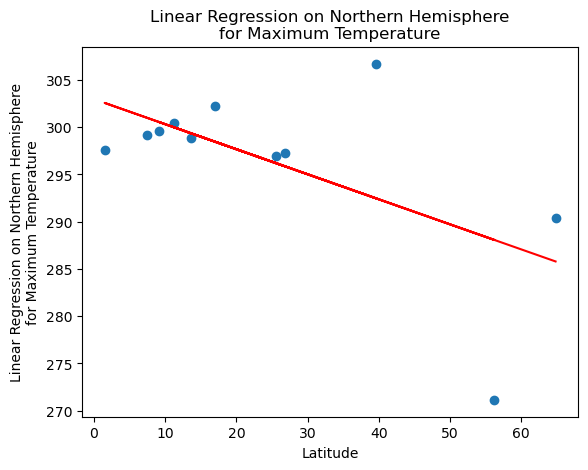

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
   
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r-")
  
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
 
    plt.title(title)

    plt.xlabel('Latitude')
    plt.ylabel(title)

    print(f"The r-squared is: {rvalue**2}")

    plt.show()
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere\nfor Maximum Temperature', (0,-20))

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere\nfor Maximum Temperature', (-50,10))

**Discussion about the linear relationship: 

The r-squared values are 0.6403056464351097 and 0.6187396104624185 for the Northern Hemisphere and Southern Hemisphere, respectively. This suggests a generally positive linear relationship between Maximum Temperature and Latitude in both hemispheres, with a little advantage for the Northern Hemisphere.This implies that Maximum Temperature tends to decline in both hemispheres when Latitude rises (i.e., goes away from the equator), albeit the decrease in the Northern Hemisphere is more evident.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.7554051916916351


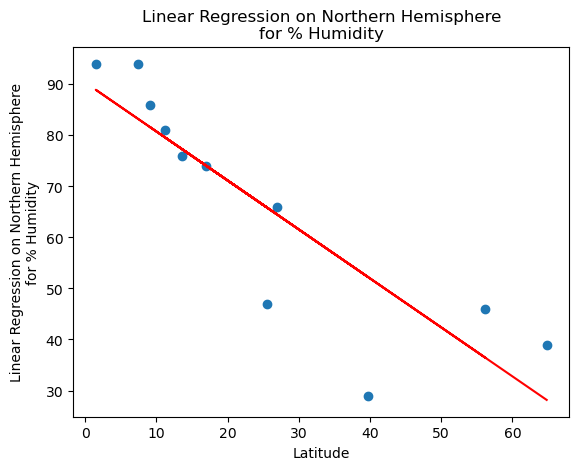

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Linear Regression on Northern Hemisphere\nfor % Humidity', (40,10))


The r-squared is: 0.0386447540323443


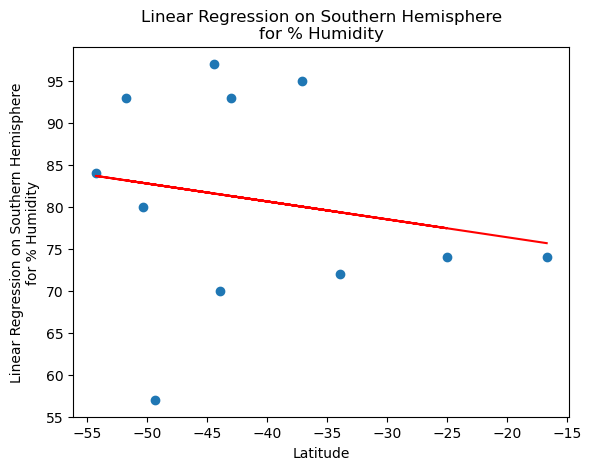

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Linear Regression on Southern Hemisphere\nfor % Humidity', (-50,15))

## Discussion about the linear relationship:
Both the Northern and Southern Hemispheres' linear regression analyses of humidity vs latitude reveal a weakly positive linear connection. The r-squared value of 0.04541597748090618 indicates that just about 4.5% of the variation in humidity in the Northern Hemisphere can be attributed to latitude. The r-squared value of 2.0953222125387034e-05 in the Southern Hemisphere similarly shows that less than 1% of the variance in humidity can be attributable to latitude. In the Southern Hemisphere, the slope of the regression line is 0.01, meaning that for every degree of latitude, humidity rises by 0.01%. However, because the slope is almost zero and the r-squared value is so low, this link is not meaningful.As a result, we can say that for the cities considered in this analysis, there is no meaningful linear relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.25773412775444937


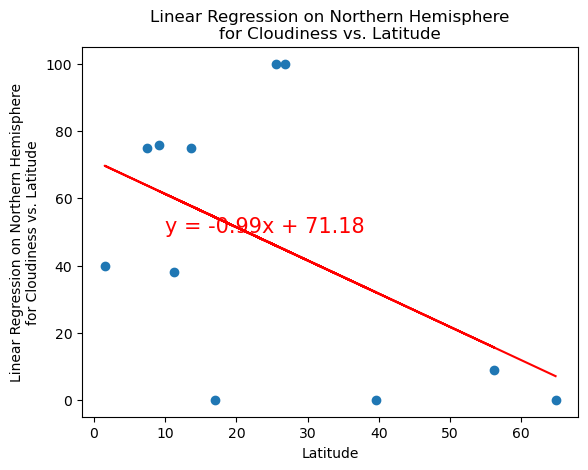

<Figure size 640x480 with 0 Axes>

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
   
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r-")
  
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
 
    plt.title(title)

    plt.xlabel('Latitude')
    plt.ylabel(title)

    print(f"The r-squared is: {rvalue**2}")

    plt.show()
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on Northern Hemisphere\nfor Cloudiness vs. Latitude', 
                       (10, 50))
plt.savefig("output_data/Fig5.png")
plt.show()

The r-squared is: 0.0386447540323443


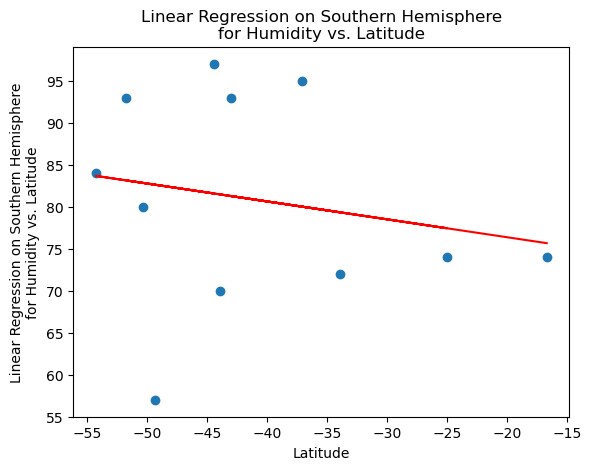

<Figure size 640x480 with 0 Axes>

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on Southern Hemisphere\nfor Humidity vs. Latitude', 
                     (-50, 20))
plt.savefig("output_data/Fig6.png")
plt.show()

## Discussion about the linear relationship:
There is essentially little correlation between latitude and cloudiness in the southern hemisphere, as seen by the regression line's nearly flat slope of 0.01.Examining the correlation between cloudiness and latitude reveals that, in both the northern and southern hemispheres, there is only a very weak correlation between the two, as seen by the slightly low r-squared values of 0.014662605703532946 and 2.0953222125387034e-05, respectively. The regression line for the northern hemisphere shows a very little positive slope of 0.26 and suggests that there may be a very small increase in cloudiness as we get closer to the equator. However, this connection is vague and not likely to be significant.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.08728254445618584


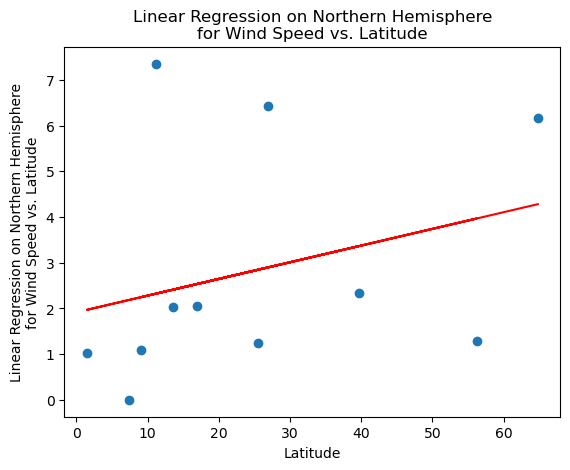

<Figure size 640x480 with 0 Axes>

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
   
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r-")
  
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
 
    plt.title(title)

    plt.xlabel('Latitude')
    plt.ylabel(title)

    print(f"The r-squared is: {rvalue**2}")

    plt.show()
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on Northern Hemisphere\nfor Wind Speed vs. Latitude', 
                      (10, 25))
plt.savefig("output_data/Fig7.png")
plt.show()

The r-squared is: 0.12125406948361785


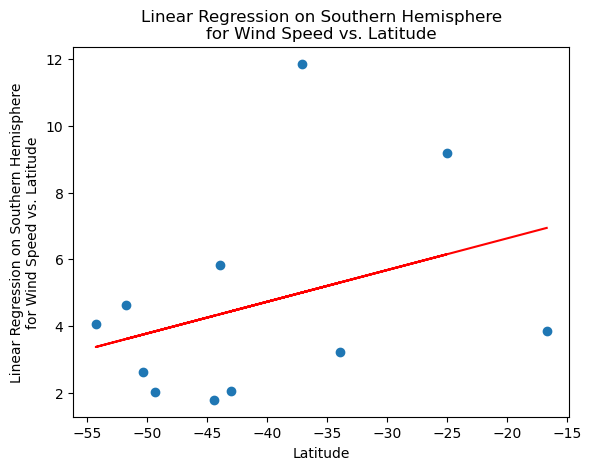

<Figure size 640x480 with 0 Axes>

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
   
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r-")
  
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
 
    plt.title(title)

    plt.xlabel('Latitude')
    plt.ylabel(title)

    print(f"The r-squared is: {rvalue**2}")

    plt.show()
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on Southern Hemisphere\nfor Wind Speed vs. Latitude', 
                      (-50, 20))
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:
Both the Northern and Southern Hemispheres exhibit low r-squared values for the correlation between latitude and wind speed, indicating that there is little linear relationship between these two variables. This suggests that wind speed may not be well predicted by latitude.The positive slope of the regression line in the Northern Hemisphere implies that wind speed increases slightly with increasing latitude. It is unlikely that the slope will have any significant practical impact because it is so slight. The regression line in the Southern Hemisphere has a negative slope, even if it is too small to be of any practical value, implying that wind speed somewhat decreases with increasing latitude. 